In [1]:
import requests
import pandas as pd
import numpy as np
import plotnine as p9
import geopandas as gpd
from shapely.geometry import shape, Point

In [2]:
os = 0
params = {'$limit': 1000, '$offset': os}
response = requests.get('https://data.cityofchicago.org/resource/6zsd-86xi.json?year=2017', params).json()
total_response = response
os = 1000
while len(response) >= 1000:
    params = {'$limit': 1000, '$offset': os}
    response = requests.get('https://data.cityofchicago.org/resource/6zsd-86xi.json?year=2017', params).json()
    os += 1000
    total_response += response
os = 0
params = {'$limit': 1000, '$offset': os}
response = requests.get('https://data.cityofchicago.org/resource/6zsd-86xi.json?year=2018', params).json()
total_response += response
os = 1000
while len(response) >= 1000:
    params = {'$limit': 1000, '$offset': os}
    response = requests.get('https://data.cityofchicago.org/resource/6zsd-86xi.json?year=2018', params).json()
    os += 1000
    total_response += response

In [3]:
crime_df = pd.DataFrame.from_dict(total_response)

In [4]:
crime_df['longitude'] = crime_df['longitude'].astype(float)
crime_df['latitude'] = crime_df['latitude'].astype(float)

I downloaded this data from the City of Chicago portal to get the names of each community area. 

In [5]:
response = requests.get('https://data.cityofchicago.org/resource/igwz-8jzy.json').json()
comm_area_name_df = pd.DataFrame.from_dict(response)
comm_area_name_df['community_area'] = comm_area_name_df['area_num_1']

Please note that in joining the two dataframes, the few observations where community area was listed as 0 were dropped as this does not correlate to a recognized community area in Chicago.

In [6]:
joined_df = pd.merge(crime_df, comm_area_name_df[['community_area','community']], on=['community_area'])

get difference in types of crimes by year

In [7]:
year_comparison_df = joined_df.groupby('year')['primary_type'].value_counts().unstack().transpose().reset_index()

In [8]:
year_comparison_df['difference'] = year_comparison_df['2018'] - year_comparison_df['2017']

In [9]:
year_comparison_df

year,primary_type,2017,2018,difference
0,ARSON,427.0,386.0,-41.0
1,ASSAULT,19195.0,20337.0,1142.0
2,BATTERY,48975.0,49008.0,33.0
3,BURGLARY,12907.0,11772.0,-1135.0
4,CONCEALED CARRY LICENSE VIOLATION,70.0,156.0,86.0
5,CRIM SEXUAL ASSAULT,1760.0,1752.0,-8.0
6,CRIMINAL DAMAGE,28609.0,27343.0,-1266.0
7,CRIMINAL TRESPASS,6745.0,6774.0,29.0
8,DECEPTIVE PRACTICE,19601.0,19501.0,-100.0
9,GAMBLING,190.0,210.0,20.0


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:430: UserWarning: position_stack : Removed 1 rows containing missing values.
  data = self.position.setup_data(self.data, params)


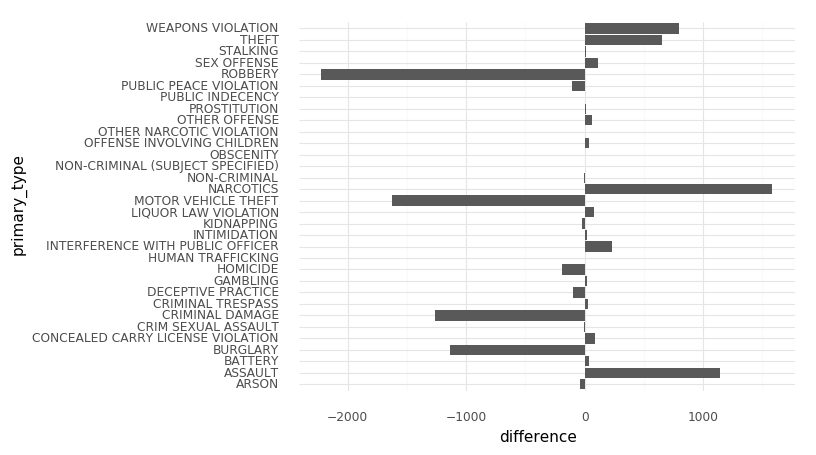

<ggplot: (-9223372029187959790)>

In [256]:
p9.ggplot(data=year_comparison_df, mapping=p9.aes('primary_type', 'difference')) + p9.geom_bar(stat='identity') + p9.theme_minimal() + p9.coord_flip()

In [11]:
total_difference = year_comparison_df['difference'].sum()

In [12]:
total_difference

-1817.0

In [13]:
total_difference/year_comparison_df['2017'].sum()

-0.006777397732910103

To get difference in community areas

In [14]:
comm_by_year = joined_df.groupby(['community', 'community_area'])['year'].value_counts().unstack().reset_index()

In [15]:
comm_by_year

year,community,community_area,2017,2018
0,ALBANY PARK,14,2489,2420
1,ARCHER HEIGHTS,57,856,784
2,ARMOUR SQUARE,34,1007,1022
3,ASHBURN,70,2498,2413
4,AUBURN GRESHAM,71,7504,7402
5,AUSTIN,25,15358,15085
6,AVALON PARK,45,1286,1165
7,AVONDALE,21,2364,2268
8,BELMONT CRAGIN,19,4600,4333
9,BEVERLY,72,909,958


Median Crime by Community area

In [16]:
comm_by_year['2017'].median()

2489.0

In [17]:
comm_by_year['2018'].median()

2413.0

Mean Crime by Community Area

In [18]:
comm_by_year['2017'].mean()

3481.779220779221

In [19]:
comm_by_year['2018'].mean()

3458.038961038961

In [20]:
melted_df = pd.melt(comm_by_year, id_vars=['community', 'community_area'])

In [248]:
melted_df

,community,community_area,year,value
0,ALBANY PARK,14,2017,2489
1,ARCHER HEIGHTS,57,2017,856
2,ARMOUR SQUARE,34,2017,1007
3,ASHBURN,70,2017,2498
4,AUBURN GRESHAM,71,2017,7504
5,AUSTIN,25,2017,15358
6,AVALON PARK,45,2017,1286
7,AVONDALE,21,2017,2364
8,BELMONT CRAGIN,19,2017,4600
9,BEVERLY,72,2017,909


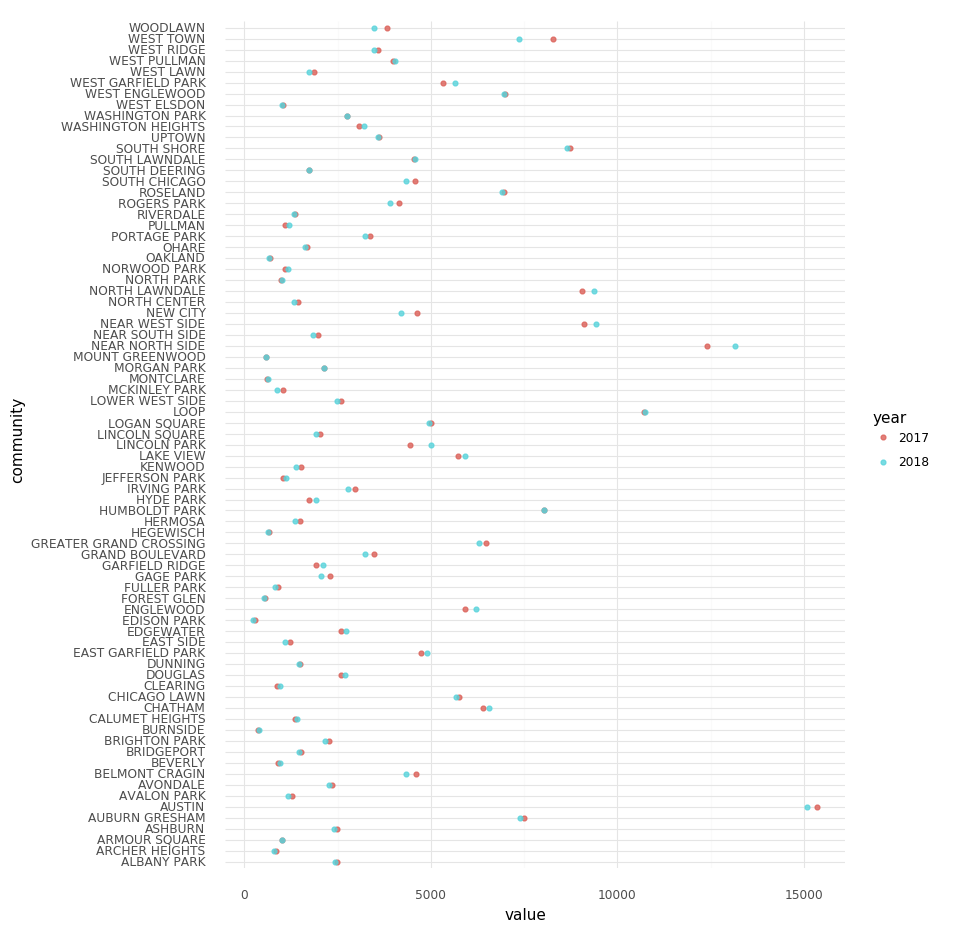

<ggplot: (7664468849)>

In [274]:
p9.ggplot(melted_df, p9.aes('community', 'value', col='year')) + p9.geom_point(p9.aes(color = 'year'), alpha=0.8) + p9.theme_minimal() + p9.coord_flip() + p9.theme(figure_size=(8, 11))

In [22]:
comm_comparison_df = joined_df.groupby(['community', 'community_area', 'year'])['primary_type'].value_counts().unstack(fill_value=0)
comm_comparison_df

primary_type                            ARSON  ASSAULT  BATTERY  BURGLARY  \
community          community_area year                                      
ALBANY PARK        14             2017      4      125      417       147   
                                  2018      0      153      486       141   
ARCHER HEIGHTS     57             2017      0       52      131        96   
                                  2018      5       51      128        56   
ARMOUR SQUARE      34             2017      0       73      186        56   
                                  2018      0       88      196        46   
ASHBURN            70             2017      3      170      450       191   
                                  2018      5      225      426       137   
AUBURN GRESHAM     71             2017     10      706     1679       336   
                                  2018      5      743     1660       308   
AUSTIN             25             2017     21     1189     3317       514   
                                  2018     37     1212     3319       485   
AVALON PARK        45             2017      5      119      282        74   
                                  2018      2      103      245        66   
AVONDALE           21             2017      8      139      354       139   
                                  2018      3      151      349       147   
BELMONT CRAGIN     19             2017     13      336      861       326   
                                  2018     14      330      864       283   
BEVERLY            72             2017      0       64       99        62   
                                  2018      0       62      116        68   
BRIDGEPORT         60             2017      6      109      216       132   
                                  2018      0      131      219       105   
BRIGHTON PARK      58             2017     11      185      479       135   
                                  2018      6      170      473        99   
BURNSIDE           47             2017      1       35       81        27   
                                  2018      0       42       68        19   
CALUMET HEIGHTS    48             2017      2      111      228        82   
                                  2018      1      150      274        61   
CHATHAM            44             2017      7      532     1274       315   
                                  2018     14      576     1352       276   
...                                       ...      ...      ...       ...   
SOUTH CHICAGO      46             2017     13      411     1094       248   
                                  2018      9      438     1052       242   
SOUTH DEERING      51             2017      3      179      344        67   
                                  2018      2      156      342        48   
SOUTH LAWNDALE     30             2017     11      394      953       183   
                                  2018     10      382      944       173   
SOUTH SHORE        43             2017     10      765     2145       570   
                                  2018      8      799     1970       504   
UPTOWN             3              2017      1      279      659       159   
                                  2018      3      254      694       162   
WASHINGTON HEIGHTS 73             2017      5      213      605       194   
                                  2018      2      282      598       167   
WASHINGTON PARK    40             2017      4      254      723       135   
                                  2018      2      267      643        99   
WEST ELSDON        62             2017      2       53      141        93   
                                  2018      0       49      136        88   
WEST ENGLEWOOD     67             2017     13      591     1624       313   
                                  2018     17      667     1628       263   
WEST GARFIELD PARK 26             2017     10      403     1107       134

Find Most Prevalent Crime by Neighborhood

In [23]:
comm_comparison_df.idxmax(axis=1)

community           community_area  year
ALBANY PARK         14              2017      THEFT
                                    2018      THEFT
ARCHER HEIGHTS      57              2017      THEFT
                                    2018      THEFT
ARMOUR SQUARE       34              2017      THEFT
                                    2018      THEFT
ASHBURN             70              2017      THEFT
                                    2018      THEFT
AUBURN GRESHAM      71              2017    BATTERY
                                    2018    BATTERY
AUSTIN              25              2017    BATTERY
                                    2018    BATTERY
AVALON PARK         45              2017    BATTERY
                                    2018    BATTERY
AVONDALE            21              2017      THEFT
                                    2018      THEFT
BELMONT CRAGIN      19              2017    BATTERY
                                    2018    BATTERY
BEVERLY             72 

In [24]:
most_common_crimes = comm_comparison_df.idxmax(axis=1).unique()
comm_crimes_df = comm_comparison_df[most_common_crimes].reset_index()
comm_crimes_df

primary_type,community,community_area,year,THEFT,BATTERY,NARCOTICS
0,ALBANY PARK,14,2017,699,417,27
1,ALBANY PARK,14,2018,549,486,26
2,ARCHER HEIGHTS,57,2017,180,131,19
3,ARCHER HEIGHTS,57,2018,203,128,21
4,ARMOUR SQUARE,34,2017,252,186,9
5,ARMOUR SQUARE,34,2018,304,196,12
6,ASHBURN,70,2017,468,450,35
7,ASHBURN,70,2018,493,426,41
8,AUBURN GRESHAM,71,2017,1206,1679,331
9,AUBURN GRESHAM,71,2018,1168,1660,405


In [25]:
for crime in most_common_crimes:
    print(crime)
    print(comm_comparison_df[crime])

THEFT
community           community_area  year
ALBANY PARK         14              2017     699
                                    2018     549
ARCHER HEIGHTS      57              2017     180
                                    2018     203
ARMOUR SQUARE       34              2017     252
                                    2018     304
ASHBURN             70              2017     468
                                    2018     493
AUBURN GRESHAM      71              2017    1206
                                    2018    1168
AUSTIN              25              2017    2150
                                    2018    2305
AVALON PARK         45              2017     242
                                    2018     216
AVONDALE            21              2017     677
                                    2018     643
BELMONT CRAGIN      19              2017     856
                                    2018     817
BEVERLY             72              2017     237
                      

For the zones/demarcation of North/Central/South/West sides: https://www.kaggle.com/mcnutt/chicagocommunityareas

In [26]:
sides_df = pd.read_csv('community-areas.csv').drop(columns = 'Unnamed: 2')
sides_df['community_area'] = sides_df['id']
sides_df = sides_df.astype(str)

In [27]:
comm_w_sides = pd.merge(comm_comparison_df.reset_index(), sides_df[['community_area', 'zone']], on=['community_area'])

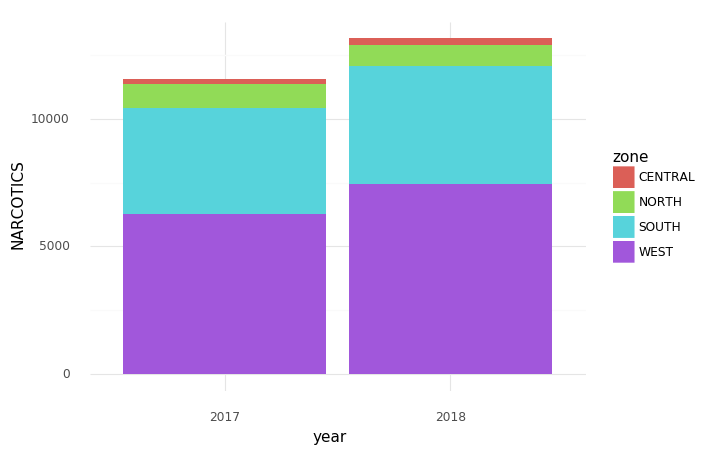

<ggplot: (-9223372029189593621)>

In [278]:
p9.ggplot(data = comm_w_sides, mapping=p9.aes('year','NARCOTICS', fill = 'zone')) + p9.geom_col() + p9.theme_minimal()

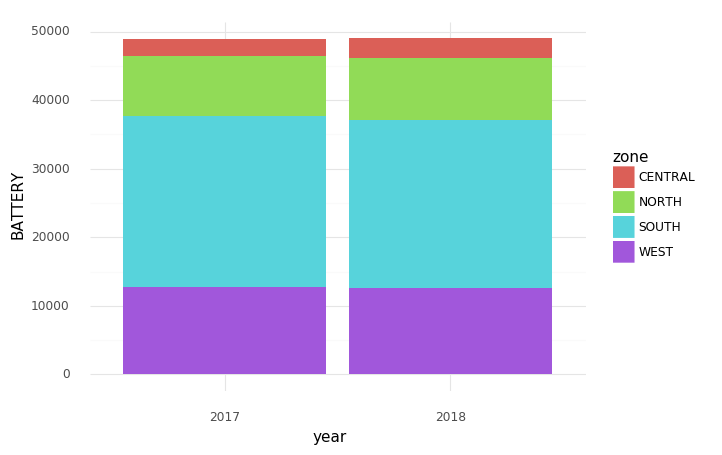

<ggplot: (7664735345)>

In [279]:
p9.ggplot(data = comm_w_sides, mapping=p9.aes('year','BATTERY', fill = 'zone')) + p9.geom_col() + p9.theme_minimal()

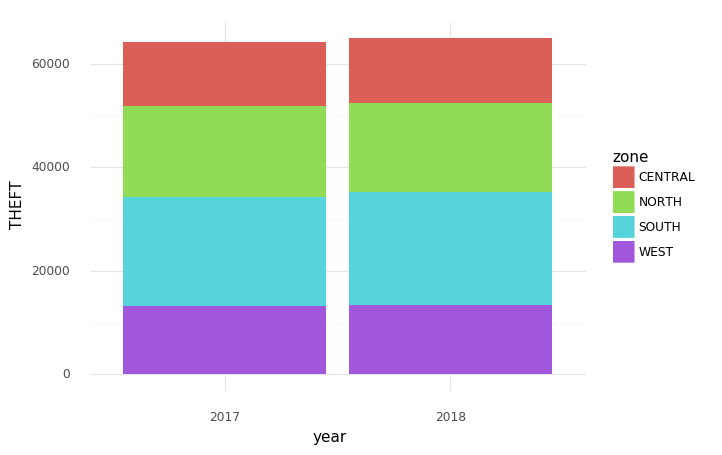

<ggplot: (-9223372029189619817)>

In [275]:
p9.ggplot(data = comm_w_sides, mapping=p9.aes('year','THEFT', fill = 'zone')) + p9.geom_col() + p9.theme_minimal()

In [31]:
response = requests.get('https://api.census.gov/data/2017/acs/acs5?get=B19001_002E,B19001_003E,B19001_004E,B19001_005E,B02001_001E,B02001_002E,B02001_003E,B03002_012E,B15003_017E,B15003_022E,NAME&for=tract:*&in=state:17%20county:031').json()

In [32]:
census_df = pd.DataFrame.from_dict(response)

In [33]:
census_df.columns = census_df.iloc[0]

In [34]:
census_df = census_df[1:]

In [35]:
cols = ['B19001_002E', 'B19001_003E', 'B19001_004E', 'B19001_004E', 'B19001_005E']
census_df[cols] = census_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [36]:
census_df['total_below_pov_line'] = census_df['B19001_002E'] + census_df['B19001_003E'] + census_df['B19001_004E'] + census_df['B19001_004E'] + census_df['B19001_005E']

In [37]:
census_df.drop(columns=['B19001_002E', 'B19001_003E', 'B19001_004E', 'B19001_004E', 'B19001_005E'], inplace=True)

In [38]:
census_df.rename(index=str, columns={"B02001_001E": "total_pop", "B02001_002E": "white_pop", "B02001_003E": "black_pop", "B03002_012E": "hispanic_pop", "B15003_017E": "high_school_degree", "B15003_022E": "bachelors_degree"}, inplace=True)

Census Tract Boundaries for Chicago Tracts from City of Chicago data portal

In [40]:
r = requests.get('https://data.cityofchicago.org/resource/74p9-q2aq.json')

In [155]:
tract_data = r.json()

In [46]:
for d in tract_data:
    d['geometry'] = shape(d['the_geom'])

In [47]:
tracts_gdf = gpd.GeoDataFrame(tract_data).set_geometry('geometry')

In [48]:
tracts_gdf['tract'] = tracts_gdf['tractce10']

In [49]:
pd.to_numeric(tracts_gdf['tract'])

0      842400
1      840300
2      841100
3      841200
4      839000
5      838200
6      650301
7      530503
8      760803
9       30601
10      30604
11      20801
12     540102
13     843300
14     540101
15     440201
16      80202
17      70102
18      31501
19      31502
20     834900
21     834800
22     160502
23     140702
24     842000
25     150402
26     834400
27      40201
28      40202
29      20702
        ...  
771    291200
772    620300
773    620400
774    630100
775    630300
776    630400
777    630500
778    110300
779    110400
780    280100
781    120100
782    280800
783    120200
784    271400
785     71000
786    281900
787    550100
788     71200
789    611500
790    611800
791    611900
792    612000
793    620100
794    620200
795     70200
796     70400
797     70500
798    130300
799    292200
800    630900
Name: tract, Length: 801, dtype: int64

In [50]:
census_w_tracts = pd.merge(census_df, tracts_gdf[['tract','geometry']], on=['tract'], how='inner')

In [64]:
census_tracts_gdf = gpd.GeoDataFrame(census_w_tracts, geometry='geometry')

I dropped the null values for lat/long as I could not convert them into Point objects for geopandas use.

In [51]:
crime_df = crime_df[crime_df['latitude'].notnull()]

In [52]:
crime_df

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
3,False,1655,0000X W TERMINAL ST,JA552928,76,2017-12-16T14:30:00.000,$500 AND UNDER,016,False,06,...,41.974862,"{'type': 'Point', 'coordinates': [-87.89037215...",AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,-87.890372,THEFT,2019-04-05T16:07:16.000,41,1104700,1933741,2017
9,False,0523,126XX S EMERALD AVE,JA330857,53,2017-07-01T16:00:00.000,CRIM SEX ABUSE BY FAM MEMBER,005,True,17,...,41.664518,"{'type': 'Point', 'coordinates': [-87.64026354...",RESIDENCE,-87.640264,OFFENSE INVOLVING CHILDREN,2019-04-04T16:07:03.000,34,1173622,1821104,2017
10,False,0522,002XX W 112TH ST,JA317004,49,2017-06-20T02:00:00.000,CRIM SEX ABUSE BY FAM MEMBER,005,True,17,...,41.690697,"{'type': 'Point', 'coordinates': [-87.62907195...",RESIDENCE,-87.629072,OFFENSE INVOLVING CHILDREN,2019-04-04T16:07:03.000,34,1176602,1830668,2017
11,False,0614,086XX S BISHOP ST,JA176893,71,2017-03-05T22:00:00.000,AGG CRIM SEX ABUSE FAM MEMBER,006,True,17,...,41.736989,"{'type': 'Point', 'coordinates': [-87.65944964...",RESIDENCE,-87.659450,OFFENSE INVOLVING CHILDREN,2019-04-04T16:07:03.000,21,1168173,1847470,2017
17,True,0312,064XX S CHAMPLAIN AVE,JA407726,42,2017-08-27T05:25:00.000,FIRST DEGREE MURDER,003,False,01A,...,41.777853,"{'type': 'Point', 'coordinates': [-87.60952399...",STREET,-87.609524,HOMICIDE,2019-04-03T16:04:24.000,20,1181674,1862471,2017
19,False,1231,018XX W TAYLOR ST,JA548532,28,2017-12-07T00:01:00.000,AGGRAVATED: OTHER,012,False,02,...,41.869185,"{'type': 'Point', 'coordinates': [-87.67198888...",NURSING HOME/RETIREMENT HOME,-87.671989,CRIM SEXUAL ASSAULT,2019-04-03T16:04:24.000,27,1164380,1895615,2017
22,False,0524,122XX S PEORIA ST,JA531665,53,2017-11-30T19:40:00.000,AGGRAVATED,005,True,09,...,41.671773,"{'type': 'Point', 'coordinates': [-87.64414609...",STREET,-87.644146,ARSON,2019-04-01T16:11:25.000,34,1172540,1823739,2017
23,False,0623,076XX S VINCENNES AVE,JA297695,69,2017-06-04T11:00:00.000,NON-AGGRAVATED,006,True,02,...,41.756092,"{'type': 'Point', 'coordinates': [-87.63234133...",RESTAURANT,-87.632341,CRIM SEXUAL ASSAULT,2019-04-01T16:11:25.000,17,1175515,1854490,2017
24,False,1433,015XX W DIVISION ST,JA148627,24,2017-02-10T12:40:00.000,BY FIRE,014,False,09,...,41.903365,"{'type': 'Point', 'coordinates': [-87.66578451...",OTHER,-87.665785,ARSON,2019-04-01T16:11:25.000,2,1165973,1908083,2017
25,True,2411,026XX W FITCH AVE,JA126650,2,2017-01-22T22:00:00.000,AGG CRIM SEX ABUSE FAM MEMBER,024,True,17,...,42.011258,"{'type': 'Point', 'coordinates': [-87.69557376...",APARTMENT,-87.695574,OFFENSE INVOLVING CHILDREN,2019-04-01T16:11:25.000,50,1157571,1947338,2017


In [54]:
crime_df['geometry'] = list(zip(crime_df.longitude, crime_df.latitude))

In [57]:
crime_df['geometry'] = crime_df['geometry'].apply(Point)

In [58]:
points_gdf = gpd.GeoDataFrame(crime_df, geometry='geometry')

In [71]:
augmented_crime_df = gpd.sjoin(points_gdf, census_tracts_gdf, how="left", op='intersects')

In [144]:
augmented_crime_df.columns

Index(['arrest', 'beat', 'block', 'case_number', 'community_area', 'date',
       'description', 'district', 'domestic', 'fbi_code', 'id', 'iucr',
       'latitude', 'location', 'location_description', 'longitude',
       'primary_type', 'updated_on', 'ward', 'x_coordinate', 'y_coordinate',
       'year', 'geometry', 'index_right', 'total_pop', 'white_pop',
       'black_pop', 'hispanic_pop', 'high_school_degree', 'bachelors_degree',
       'NAME', 'state', 'county', 'tract', 'total_below_pov_line'],
      dtype='object')

In [126]:
columns = ['total_pop', 'white_pop', 'black_pop', 'hispanic_pop', 'high_school_degree', 'bachelors_degree']

In [127]:
augmented_crime_df[columns] = augmented_crime_df[columns].apply(pd.to_numeric, errors='coerce')

In [152]:
mask = augmented_crime_df['primary_type'] == 'BATTERY'

In [246]:
high_batt = augmented_crime_df[mask].groupby('tract')['primary_type'].value_counts().sort_values(ascending=False)[:10]

In [247]:
high_batt

tract   primary_type
839100  BATTERY         837
838700  BATTERY         634
420700  BATTERY         630
231500  BATTERY         628
440101  BATTERY         601
251900  BATTERY         559
231200  BATTERY         531
251800  BATTERY         529
252202  BATTERY         529
431302  BATTERY         512
Name: primary_type, dtype: int64

In [153]:
grouped_df = augmented_crime_df[mask].groupby('tract')[columns].sum()

In [154]:
grouped_df[['white_pop', 'black_pop', 'hispanic_pop', 'high_school_degree', 'bachelors_degree']].div(grouped_df['total_pop'].values,axis=0)

,white_pop,black_pop,hispanic_pop,high_school_degree,bachelors_degree
tract,,,,,
010100,0.452070,0.463321,0.092259,0.100135,0.141764
010201,0.504933,0.391274,0.226066,0.124218,0.147839
010202,0.494974,0.298754,0.288299,0.105750,0.145959
010300,0.601746,0.286605,0.187744,0.181194,0.143147
010400,0.695066,0.217705,0.072075,0.062096,0.170024
010501,0.534673,0.334232,0.097035,0.090664,0.244793
010502,0.613075,0.245914,0.064234,0.058153,0.223109
010503,0.733268,0.073766,0.137274,0.163166,0.133366
010600,0.614582,0.215196,0.229010,0.109286,0.185418
